In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
url="https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv"
df=pd.read_csv(url,parse_dates=["Month"])

In [2]:
print(df.head())

       Month  Sunspots
0 1749-01-01      58.0
1 1749-02-01      62.6
2 1749-03-01      70.0
3 1749-04-01      55.7
4 1749-05-01      85.0


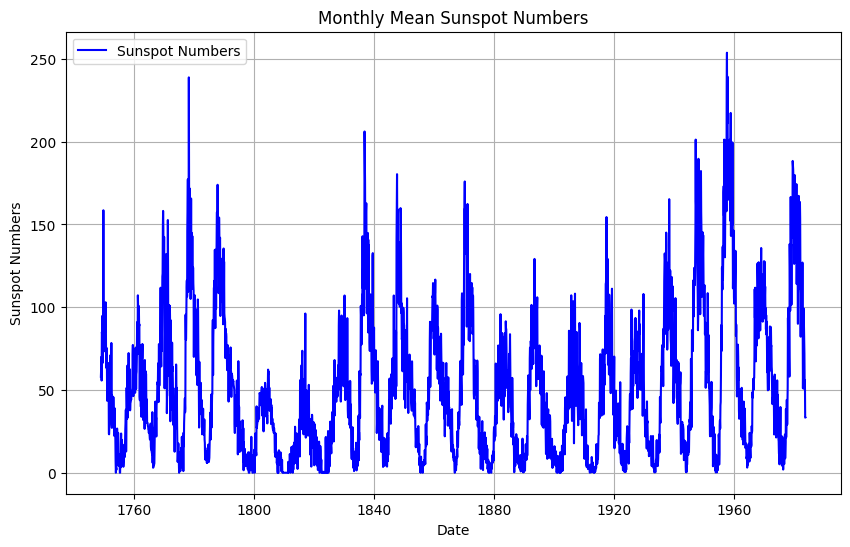

In [4]:
plt.figure(figsize=(10,6))
plt.plot(df["Month"],df["Sunspots"],color='b',label="Sunspot Numbers")
plt.xlabel("Date")
plt.ylabel("Sunspot Numbers")
plt.title("Monthly Mean Sunspot Numbers")
plt.grid(True)
plt.legend()
plt.show()

In [5]:
df.describe()

,Month,Sunspots
count,2820,2820.000000
mean,1866-06-16 10:38:17.872340992,51.265957
min,1749-01-01 00:00:00,0.000000
25%,1807-09-23 12:00:00,15.700000
50%,1866-06-16 00:00:00,42.000000
75%,1925-03-08 18:00:00,74.925000
max,1983-12-01 00:00:00,253.800000
std,NaN,43.448971


<Axes: xlabel='Month'>

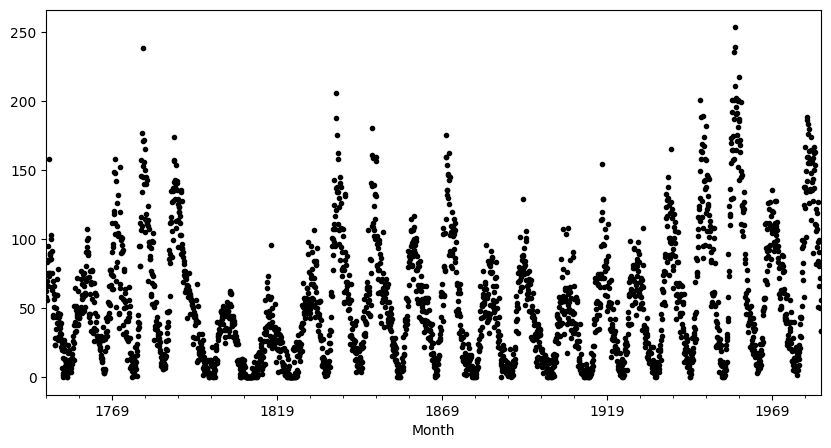

In [6]:
df["Month"]=pd.to_datetime(df['Month'])
data_new=df.set_index(df["Month"])
data_new1=data_new.drop(labels=["Month"],axis=1)
fig=plt.figure(figsize=(10,5))
data_new1["Sunspots"].plot(style="k.")

In [7]:
data_q=data_new1.resample('q').mean()
data_q.head()

C:\Users\admin\AppData\Local\Temp\ipykernel_15232\735669377.py:1: FutureWarning: 'q' is deprecated and will be removed in a future version, please use 'QE' instead.
  data_q=data_new1.resample('q').mean()


,Sunspots
Month,
1749-03-31,63.533333
1749-06-30,74.733333
1749-09-30,79.000000
1749-12-31,106.433333
1750-03-31,79.466667


In [8]:
def adfuller_test(data):
    result=adfuller(data)
    labels=["ADF Tesr Statistic","p-value","Lags Used","Number of Observations Used"]
    for value,label in zip(result,labels):
        print(label+":"+str(value))
    if result[1] <=0.05:
        print("strong evidence against the null hypothesis(H0), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary")

<Axes: xlabel='Month'>

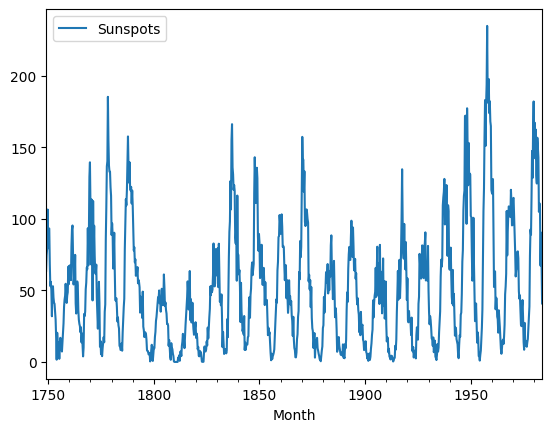

In [9]:
data_q.plot()

<Axes: xlabel='Month'>

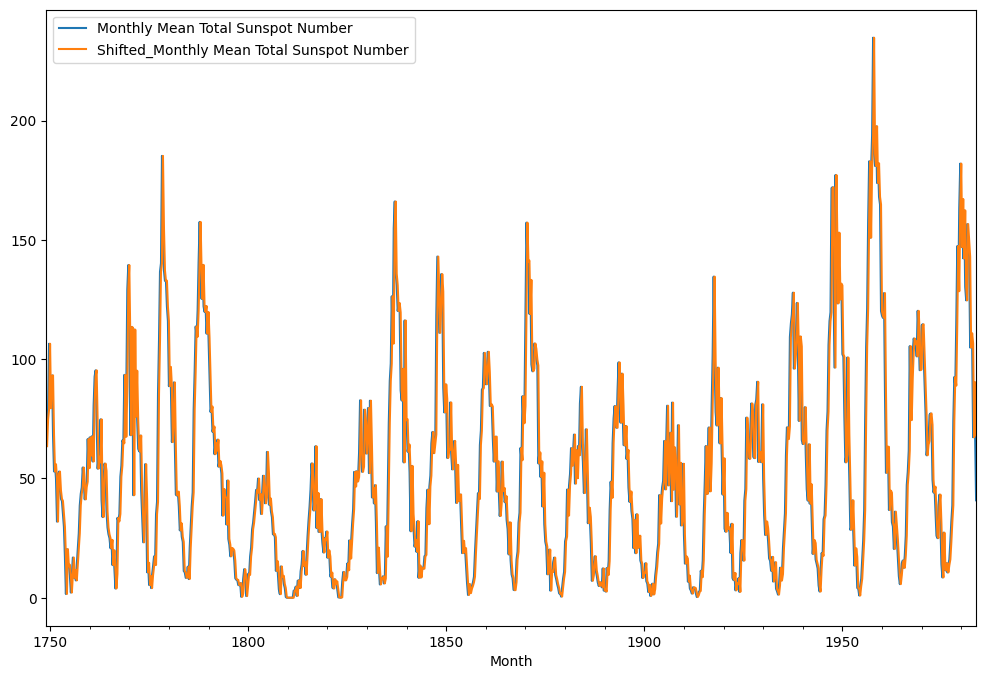

In [10]:
base_data=data_q.copy()
base_data["Monthly Mean Total Sunspot Number"]=base_data["Sunspots"]
base_data["Shifted_Monthly Mean Total Sunspot Number"]=base_data["Monthly Mean Total Sunspot Number"].shift(1)
base_data[["Monthly Mean Total Sunspot Number","Shifted_Monthly Mean Total Sunspot Number"]].plot(figsize=(12,8))

In [11]:
base_data=base_data.dropna()
from sklearn.metrics import mean_squared_error
print("Mean Squared Error:"+str(mean_squared_error(base_data["Monthly Mean Total Sunspot Number"],base_data["Shifted_Monthly Mean Total Sunspot Number"])))

Mean Squared Error:238.70118210862617


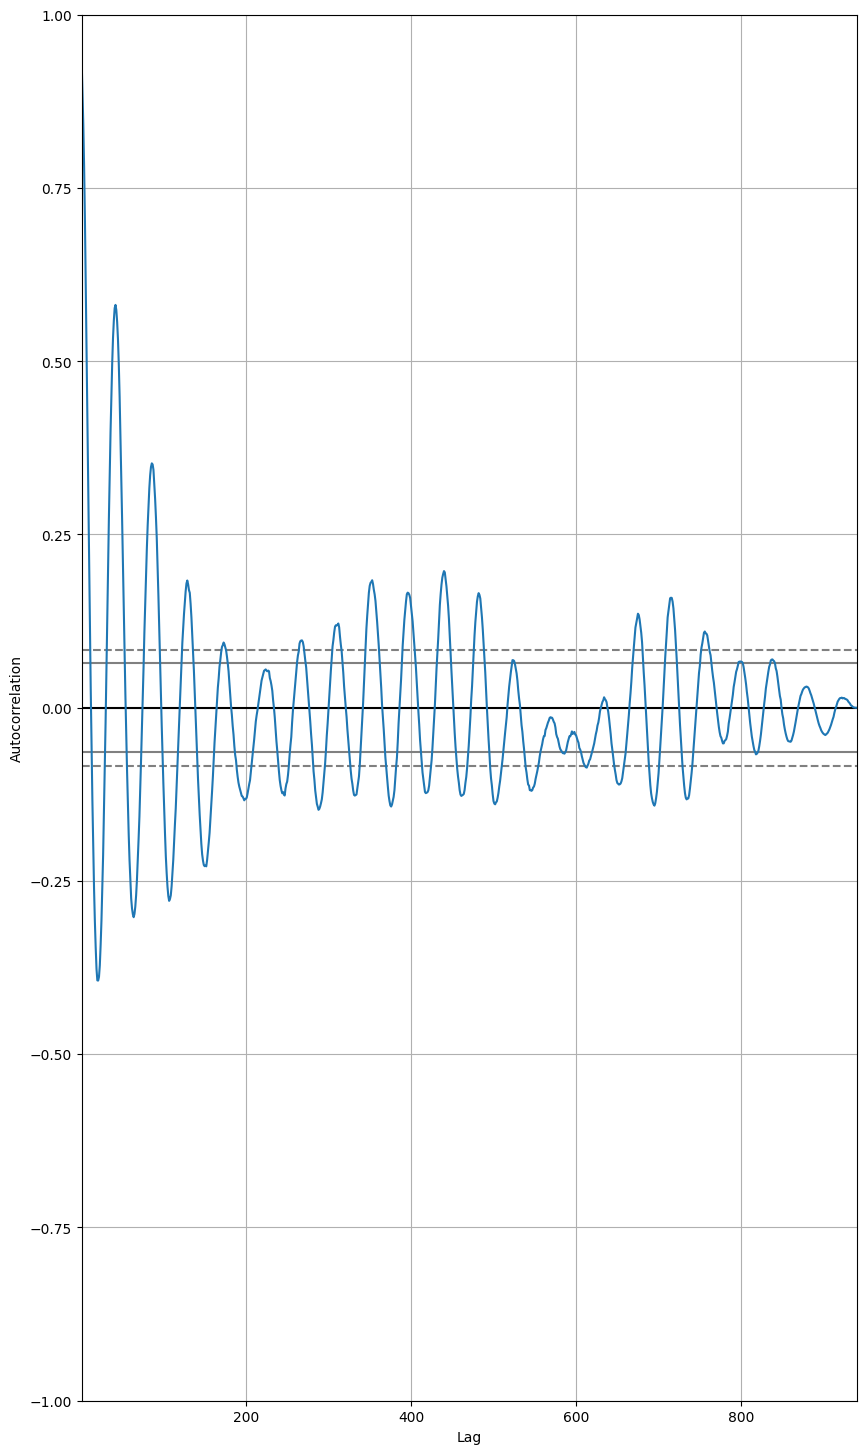

In [12]:
fig=plt.figure(figsize=(10,18))
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(data_q)
plt.show()

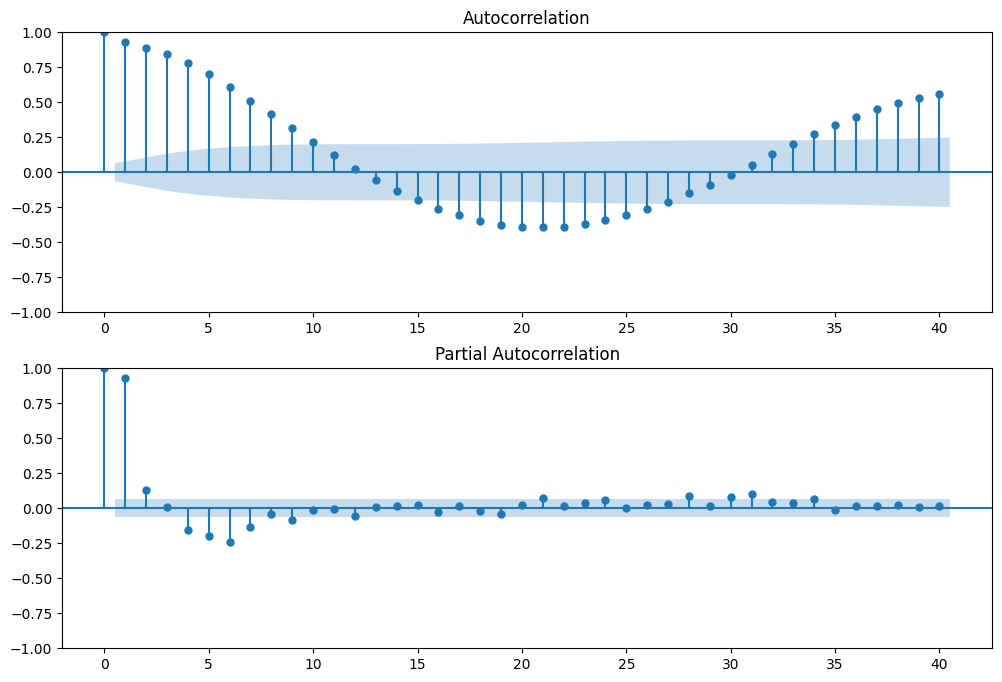

In [13]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig=plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig=sm.graphics.tsa.plot_acf(data_q,lags=40,ax=ax1)
ax2=fig.add_subplot(212)
fig=sm.graphics.tsa.plot_pacf(data_q,lags=40,ax=ax2)

In [14]:
from statsmodels.tsa.arima_model import ARIMA
model=sm.tsa.statespace.SARIMAX(data_q["Sunspots"],order=(2,0,2),seasonal_order=(2,0,2,6))
results=model.fit()
results.summary()

C:\Users\admin\AppData\Roaming\Python\Python312\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                          Sunspots   No. Observations:                  940
Model:             SARIMAX(2, 0, 2)x(2, 0, 2, 6)   Log Likelihood               -3859.946
Date:                           Tue, 01 Apr 2025   AIC                           7737.893
Time:                                   12:02:47   BIC                           7781.506
Sample:                               03-31-1749   HQIC                          7754.519
                                    - 12-31-1983                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7901      0.076     23.410      0.000       1.640       1.940
ar.L2         -0.7916      0.077    -10.329      0.000      -0.942      -0.641
ma.L1         -1.1080      0.073    -15.098      0.000      -1.252      -0.964
ma.L2          0.3437      0.025     13.772      0.000       0.295       0.393
ar.S.L6        1.2730      0.043     29.425      0.000       1.188       1.358
ar.S.L12      -0.9213      0.043    -21.252      0.000      -1.006      -0.836
ma.S.L6       -1.2801      0.053    -24.278      0.000      -1.383      -1.177
ma.S.L12       0.8757      0.051     17.044      0.000       0.775       0.976
sigma2       214.5374      7.298     29.399      0.000     200.234     228.840
===================================================================================
Ljung-Box (L1) (Q):                   2.08   Jarque-Bera (JB):               129.41
Prob(Q):                              0.15   Prob(JB):                         0.00
Heteroskedasticity (H):               1.64   Skew:                             0.11
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

C:\Users\admin\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2473: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


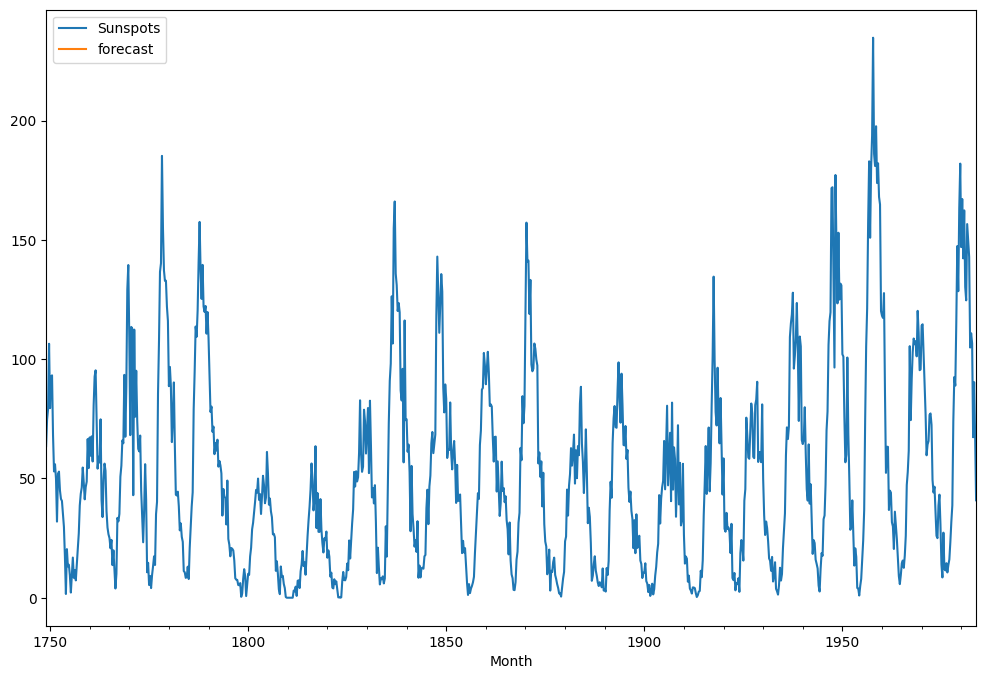

In [17]:
data_q['forecast']=results.predict(start=1000,end=1084,dynamic=True)
data_q[["Sunspots","forecast"]].plot(figsize=(12,8))
plt.show()